In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [0]:

def get_data(filePath):
    return pd.read_csv(filePath)

In [0]:
def remove_skew(dataframe):
    for i in dataframe.columns:
        if dataframe[i].skew() >= 0.30:
            dataframe[i] = np.log1p(dataframe[i])
        elif dataframe[i].skew() <= -0.30:
            dataframe[i] = np.square(dataframe[i])
    return dataframe

In [0]:
def normalize(dataframe):
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(dataframe), columns=dataframe.columns)


In [0]:
def model(inputs, num_features):
    # hidden layer 1
    W_1 = tf.Variable(tf.random_normal([num_features, 8], 0, 0.1, dtype=tf.float32))
    b_1 = tf.Variable(tf.zeros([8], dtype=tf.float32))
    layer_1 = tf.add(tf.matmul(inputs, W_1), b_1)
    layer_1_result = tf.nn.sigmoid(layer_1)

    # hidden layer 2
    W_2 = tf.Variable(tf.random_normal([8, 5], 0, 0.1, dtype=tf.float32))
    b_2 = tf.Variable(tf.zeros([5], dtype=tf.float32))
    layer_2 = tf.add(tf.matmul(layer_1_result, W_2), b_2)
    layer_2_result = tf.nn.sigmoid(layer_2)
    
    # output layer
    W_o = tf.Variable(tf.random_normal([5, 1], 0, 0.1, dtype=tf.float32))
    b_o = tf.Variable(tf.zeros([1], dtype=tf.float32))
    layer_o = tf.add(tf.matmul(layer_2_result, W_o), b_o)
    layer_o_result = tf.nn.sigmoid(layer_o)

    return layer_o_result
#   lastY = inputs
#   for i, (Wi, bi) in enumerate(zip(W, b)):
#     y = tf.add(tf.matmul(lastY, W[i]), b[i])

#     if i == len(W)-1:
#       return y
#     lastY = tf.nn.sigmoid(y)


In [8]:
from google.colab import files
files.upload()

Saving data.csv to data.csv


{'data.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\r\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\r\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\r\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\r\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\r\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\r\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\r\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\r\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\r\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\r\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\r\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\r\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,1

In [0]:

# obtain dataframe
df = get_data('data.csv')

# remove skewness
df = remove_skew(df)

# scale data
df = normalize(df)

In [0]:
from sklearn.model_selection import train_test_split

x = pd.DataFrame(data=df.drop(columns=['medv']))
y = df['medv']

# split data to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

num_features = x_train.shape[1]

In [0]:
inputs = tf.placeholder(tf.float32, shape=[None, num_features], name='X_in')
outputs = tf.placeholder(tf.float32, shape=[None, 1], name='Y_out')

# create variables
batch_size = 50
num_batches = int(x_train.shape[0] / batch_size)

# layers = [num_features, 5, 1]
# W = []
# b = []

# for i in range(1, len(layers)):
#   W.append(tf.Variable(tf.random_normal([layers[i-1], layers[i]], 0, 0.1, dtype=tf.float32)))
#   b.append(tf.Variable(tf.random_normal([layers[i]])))

y_hat = model(inputs, num_features)

learning_rate = 0.001

In [0]:
cost_op = tf.reduce_mean(tf.pow(y_hat - outputs, 2))
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_op)

total_epochs = 20000

In [60]:
# train model
sess = tf.Session()
with sess.as_default():
    # initialize vars
    sess.run(tf.global_variables_initializer())

    costs = []
    epochs = []
    cost = 0.0
    epoch = 0
    # train until epochs total
    while True:
        for n in range(num_batches):
            x_batch = x_train[n * batch_size : (n + 1) * batch_size]
            y_batch = y_train[n * batch_size : (n + 1) * batch_size]

            sess.run(train, feed_dict={inputs: x_batch, outputs: y_batch})
            c = sess.run(cost_op, feed_dict={inputs: x_batch, outputs: y_batch})
            cost += c
        cost /= num_batches
        costs.append(cost)
        epochs.append(epoch)
        epoch += 1

        if epoch % 1000 == 0:
            print("Cost after %d epochs: %1.8f" % (epoch, cost))
        if epoch >= total_epochs:
            break

Cost after 1000 epochs: 0.00855471
Cost after 2000 epochs: 0.00624272
Cost after 3000 epochs: 0.00535803
Cost after 4000 epochs: 0.00470424
Cost after 5000 epochs: 0.00420670
Cost after 6000 epochs: 0.00367658
Cost after 7000 epochs: 0.00316436
Cost after 8000 epochs: 0.00285149
Cost after 9000 epochs: 0.00265428
Cost after 10000 epochs: 0.00252499
Cost after 11000 epochs: 0.00243279
Cost after 12000 epochs: 0.00235757
Cost after 13000 epochs: 0.00229245
Cost after 14000 epochs: 0.00223753
Cost after 15000 epochs: 0.00219281
Cost after 16000 epochs: 0.00215631
Cost after 17000 epochs: 0.00212517
Cost after 18000 epochs: 0.00209660
Cost after 19000 epochs: 0.00206788
Cost after 20000 epochs: 0.00203655


In [64]:
print("Test cost: ", sess.run(cost_op, feed_dict={inputs: x_test, outputs: y_test}))

Test cost:  0.0062379357


In [0]:
import matplotlib.pyplot as plt

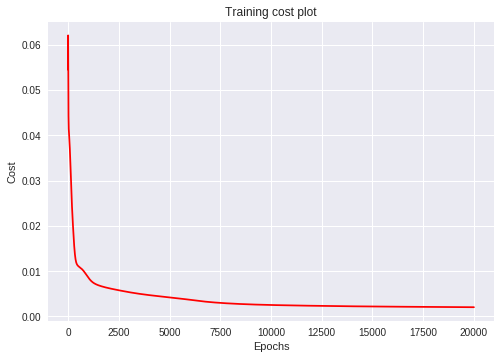

In [61]:
plt.figure()
plt.title('Training cost plot')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.plot(epochs, costs, color='r', label='Training cost')

In [50]:
len(costs)

20000

In [0]:
y_pred = sess.run(y_hat, feed_dict={inputs: x_test, outputs: y_test})

In [70]:
print("\nPrediction\nreal\tpredicted")
for (y, y_) in list(zip(y_test, y_pred))[0:10]:
  print("%1.1f\t%1.1f" % (y, y_))


Prediction
real	predicted
0.8	0.8
0.6	0.7
0.5	0.5
0.5	0.5
0.7	0.7
0.3	0.4
0.6	0.5
0.5	0.4
0.7	0.8
0.5	0.5


In [72]:
from sklearn import metrics

r2 = metrics.r2_score(y_test, y_pred)
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("r2 score: ", metrics.r2_score(y_test, y_pred))


MSE:  0.006237935687557121
r2 score:  0.7879135928652271
